In [3]:
# Librairies standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librairies Natural Language ToolKit
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Fonctions scikit-learn
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

#Fichier du prof
import preprocessing_challenge as pp

[nltk_data] Downloading package stopwords to /home/elies/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/elies/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/elies/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Analyse

In [5]:
data_file = './datasets/X_y_train.csv'
df = pd.read_csv(data_file)
print(df)

          Id                                               text  level
0          0  \r\r\n      Hi! Just some words about the prod...      3
1          1  \r\r\n      Dear Sir and Madam,I am writing to...      3
2          2  \r\r\n      Isabella tells John her life and h...      1
3          3  \r\r\n      From: fabsymon To: Everybody Subje...      1
4          4  \r\r\n      my name is alison . i live in fren...      0
...      ...                                                ...    ...
13366  13366  \r\r\n      This week end there will a big con...      1
13367  13367  \r\r\n      Hi, Thank you for sending me the r...      2
13368  13368  \r\r\n      Hello Aunt Jane, I'm happy to help...      1
13369  13369  \r\r\n      I first time a saw my partner, I w...      2
13370  13370  \r\r\n      Dear Ms Thomas, There are thirteen...      0

[13371 rows x 3 columns]


In [6]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="dark")
sns.set(font_scale=1.85)

In [7]:
sent_df = pp.get_sentences(df, 'text', 'level')

In [ ]:
# Break the Data Frame into pieces sentence-wise
sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,Hi!,1,2.00,3,0
1,Just some words about the product &quot;Transf...,10,5.70,3,0
2,With $235 the cost is in the average Market.,9,3.78,3,0
3,The important differences are the features.,6,6.17,3,0
4,It's a palm-size which could translates 500 us...,22,4.45,3,0
...,...,...,...,...,...
82368,"he approached me, I answered as I could in Eng...",12,4.08,2,13369
82369,"I became increasingly attracted by his eyes, h...",29,4.62,2,13369
82370,Now I find myself please take English lessons.,8,4.75,2,13369
82371,"Dear Ms Thomas, There are thirteen computers a...",29,5.34,0,13370


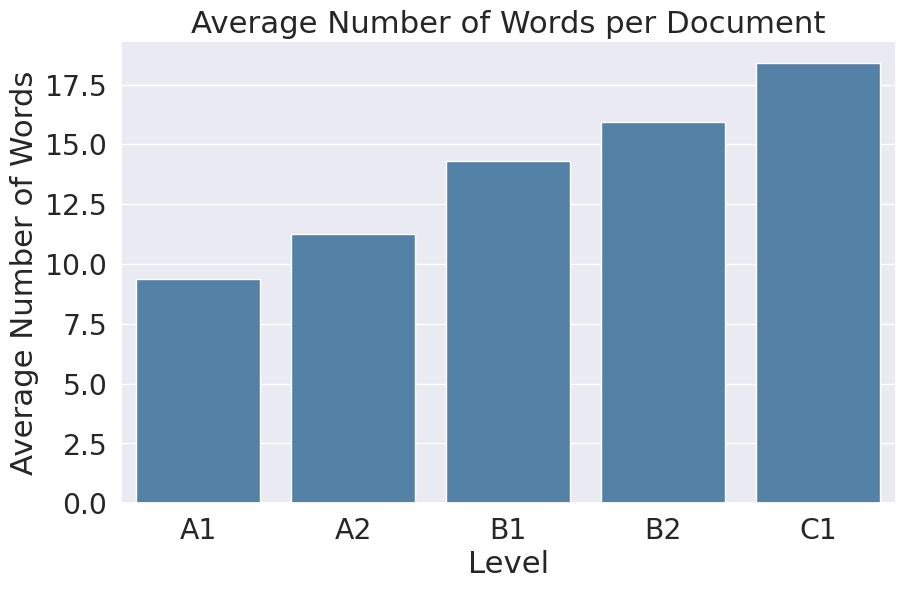

In [ ]:
# Examine the length of the readings by level:
# The chart below shows the average number of words and length of the words per document
avg_words = (
    sentence_df[["level", "num_of_words", "avg_len_words"]].groupby("level").mean()
)

df = pd.DataFrame(
    {
        "Level": ["A1", "A2", "B1", "B2", "C1"],
        "avg_number_words": avg_words["num_of_words"],
        "avg_word_length": avg_words["avg_len_words"],
    }
)

# Create bar plot for average number of words
sns.barplot(data=df, x="Level", y="avg_number_words", color="steelblue")
plt.title("Average Number of Words per Level")
plt.ylabel("Average Number of Words")
plt.show()

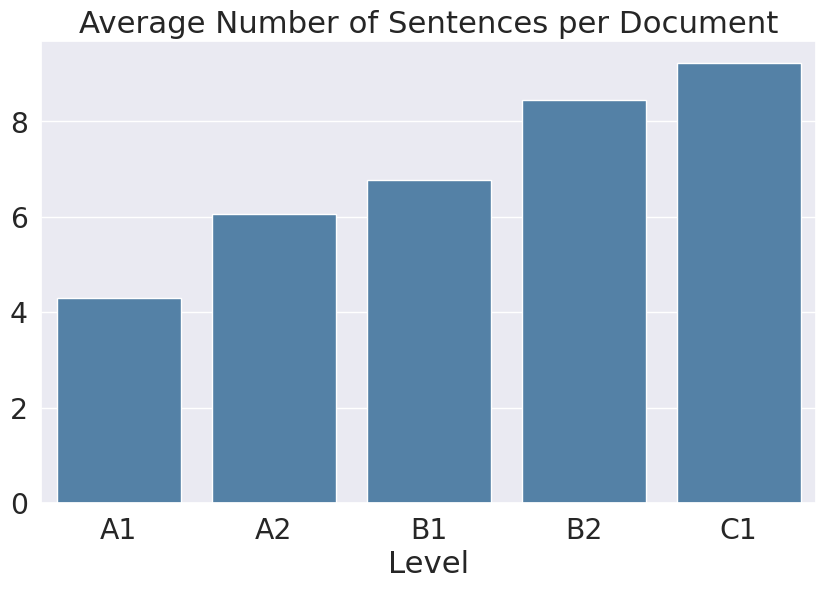

In [ ]:
avg = sentence_df.groupby(['level', 'doc_id']).count()['text'].groupby('level').mean()
df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1'], 'avg_number_sentences': avg})

sns.barplot(data=df, x='Level', y='avg_number_sentences', color='steelblue')
plt.title(label='Average Number of Sentences per Level')

plt.ylabel("")

plt.show()

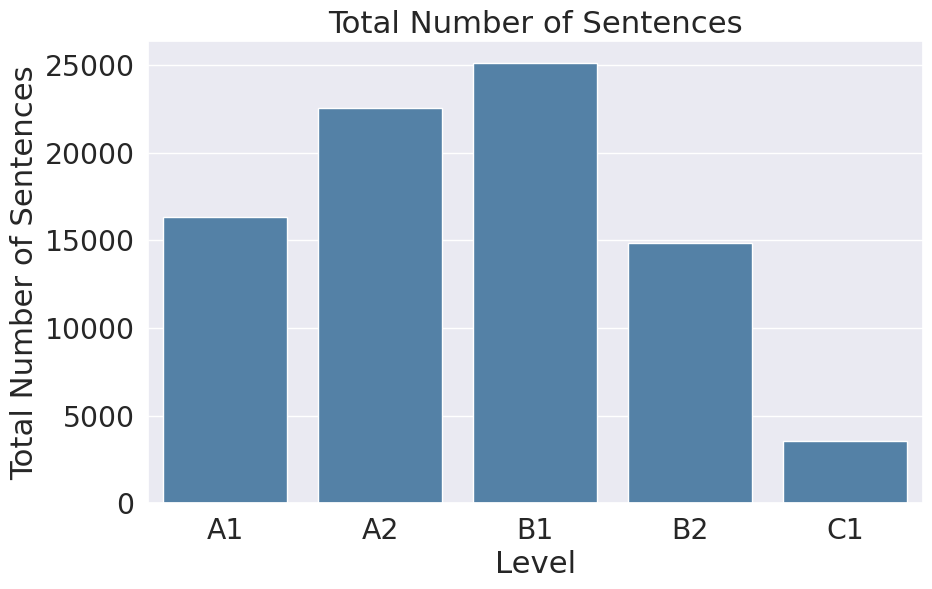

In [14]:
avg = sentence_df.groupby(['level']).count()['text']

df = pd.DataFrame({'Level':['A1', 'A2', 'B1', 'B2', 'C1'], 'Total Number of Sentences': avg})

sns.barplot(data=df, x='Level', y='Total Number of Sentences', color='steelblue')

plt.title(label='Total Number of Sentences')


plt.show()